<a href="https://colab.research.google.com/github/aljoharas/IT326/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Phase 3 Classification**

**Importing Required Libraries:**

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Loading Data:**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aljoharas/IT326/refs/heads/main/Dataset/Processed_dataset.csv')

# **Classification**

 is a supervised learning technique that uses labeled data to build a model capable of predicting the class of new, unseen data. It involves categorizing or classifying data objects into predefined classes or categories based on their features or attributes.

In this phase, we aim to classify the likelihood of air quality being categorized as Good, Moderate, or poor using two attribute selection measures: the Gini Index and Information Gain (Entropy).

The target attribute is the "Air Quality" attribute.

In our dataset, all features are considered relevant and will be used for building the classification model, so no attributes are excluded.

**Feature Selection:**

In [3]:
X = df[['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']]
y = df['Air Quality']

### **Splitting Data into training and test sets:**

The classification will be performed using three different data splits:


* 70% training / 30% testing     
* 80% training / 20% testing
* 60% training / 40% testing






### **Gini Index**
The Gini Index is a measure of how mixed or impure a dataset is. The Gini impurity ranges between 0 and 1, where 0 represents a pure dataset and 1 represents a completely impure dataset.

- In a pure dataset, all the samples belong to the same class or category.
- In an impure dataset, there is a mixture of different classes or categories.

In decision tree algorithms, a pure dataset is ideal because it can be easily split into subsets of the same class. An impure dataset, containing a mix of classes, is harder to split.

The key point is that attributes with a lower Gini index are preferred, as lower Gini impurity indicates a better feature for splitting the dataset.



**1) 70% training / 30% testing**



Accuracy:
 0.914
Confusion Matrix:
 [[617   0   1   0]
 [  0 121   2  25]
 [  3   0 408  41]
 [  0  30  27 225]]
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       618
   Hazardous       0.80      0.82      0.81       148
    Moderate       0.93      0.90      0.92       452
        Poor       0.77      0.80      0.79       282

    accuracy                           0.91      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.92      0.91      0.91      1500


 Confusion Matrix:
 [[617   0   1   0]
 [  0 121   2  25]
 [  3   0 408  41]
 [  0  30  27 225]]


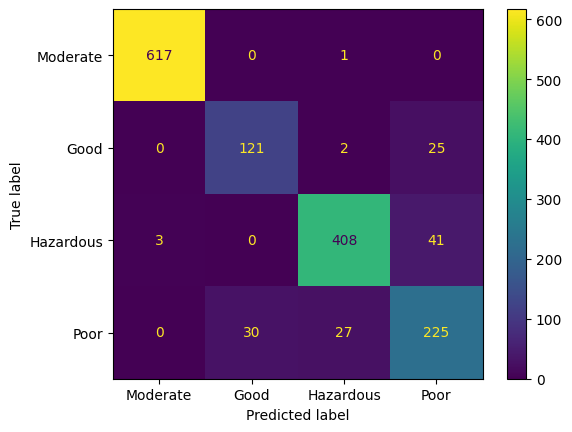

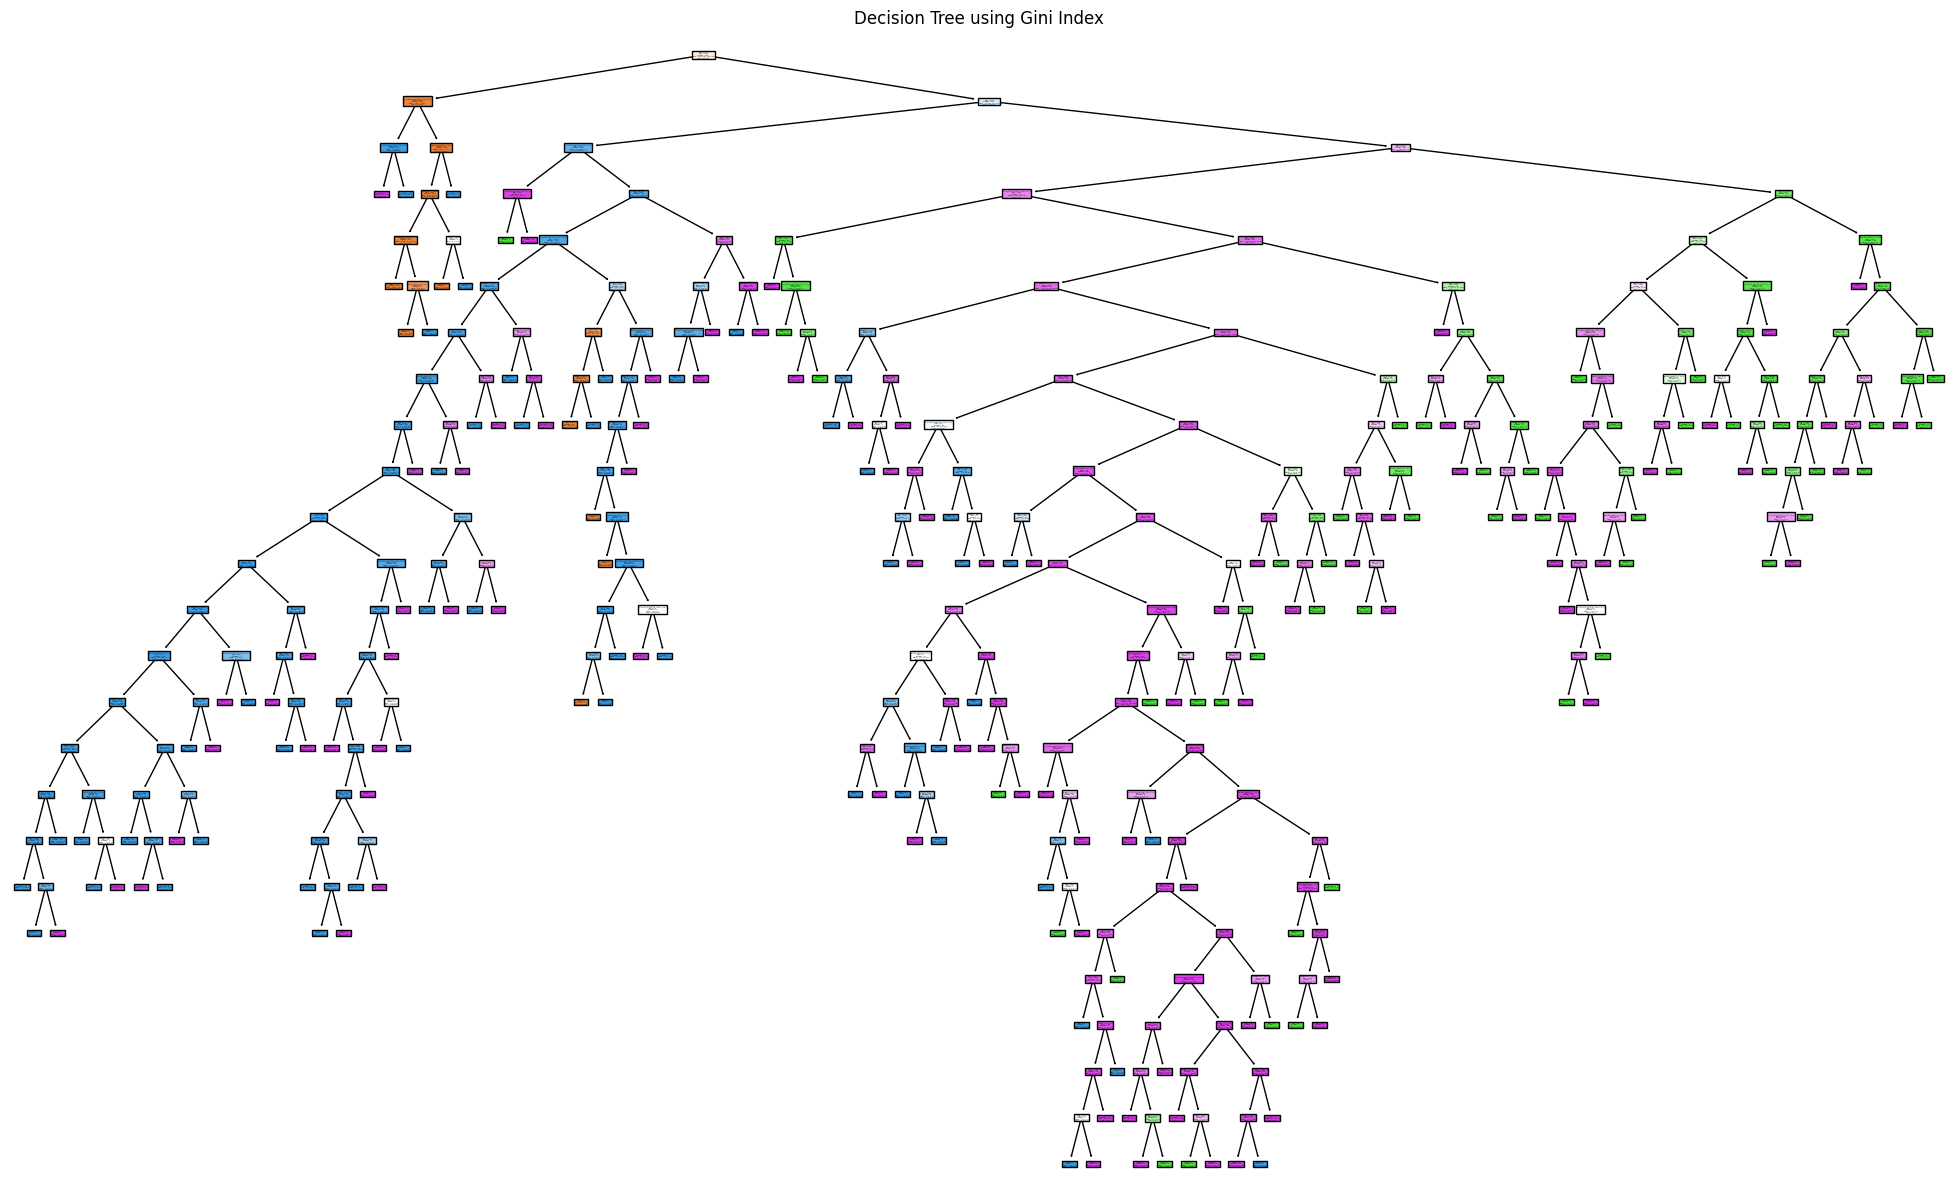

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

#Splitting Data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Building Decision Tree Model:
#create decision tree classifier object
clf = DecisionTreeClassifier(criterion='gini')

#train decision tree classifier
clf.fit(X_train, y_train)

#prediction
y_pred = clf.predict(X_test)

#Evaluating the Model:
#printing the Performance metrics

print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm)

#Visualizing confusion matrix figure:
cn=df['Air Quality'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)
plt.show()


#Visualizing Decision Trees figure:
plt.figure(figsize=(25, 15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Moderate', 'Good', 'Hazardous','Poor'])
plt.title('Decision Tree using Gini Index')
plt.show()



**2) 80% training / 20% testing**



Accuracy:
 0.931
Confusion Matrix:
 [[408   0   1   0]
 [  0  89   0  22]
 [  3   0 278  13]
 [  0  21   9 156]]
Classification Report:
               precision    recall  f1-score   support

        Good       0.99      1.00      1.00       409
   Hazardous       0.81      0.80      0.81       111
    Moderate       0.97      0.95      0.96       294
        Poor       0.82      0.84      0.83       186

    accuracy                           0.93      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.93      0.93      0.93      1000


 Confusion Matrix:
 [[408   0   1   0]
 [  0  89   0  22]
 [  3   0 278  13]
 [  0  21   9 156]]


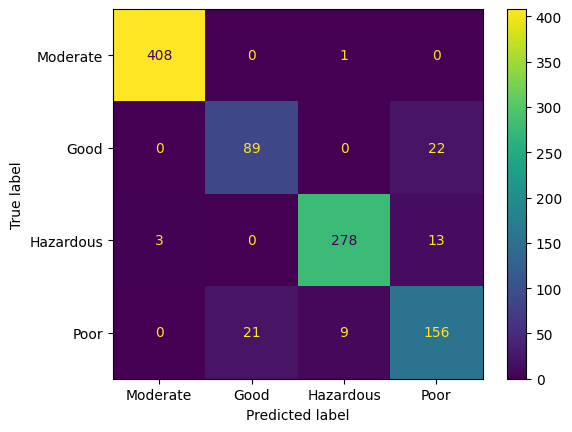

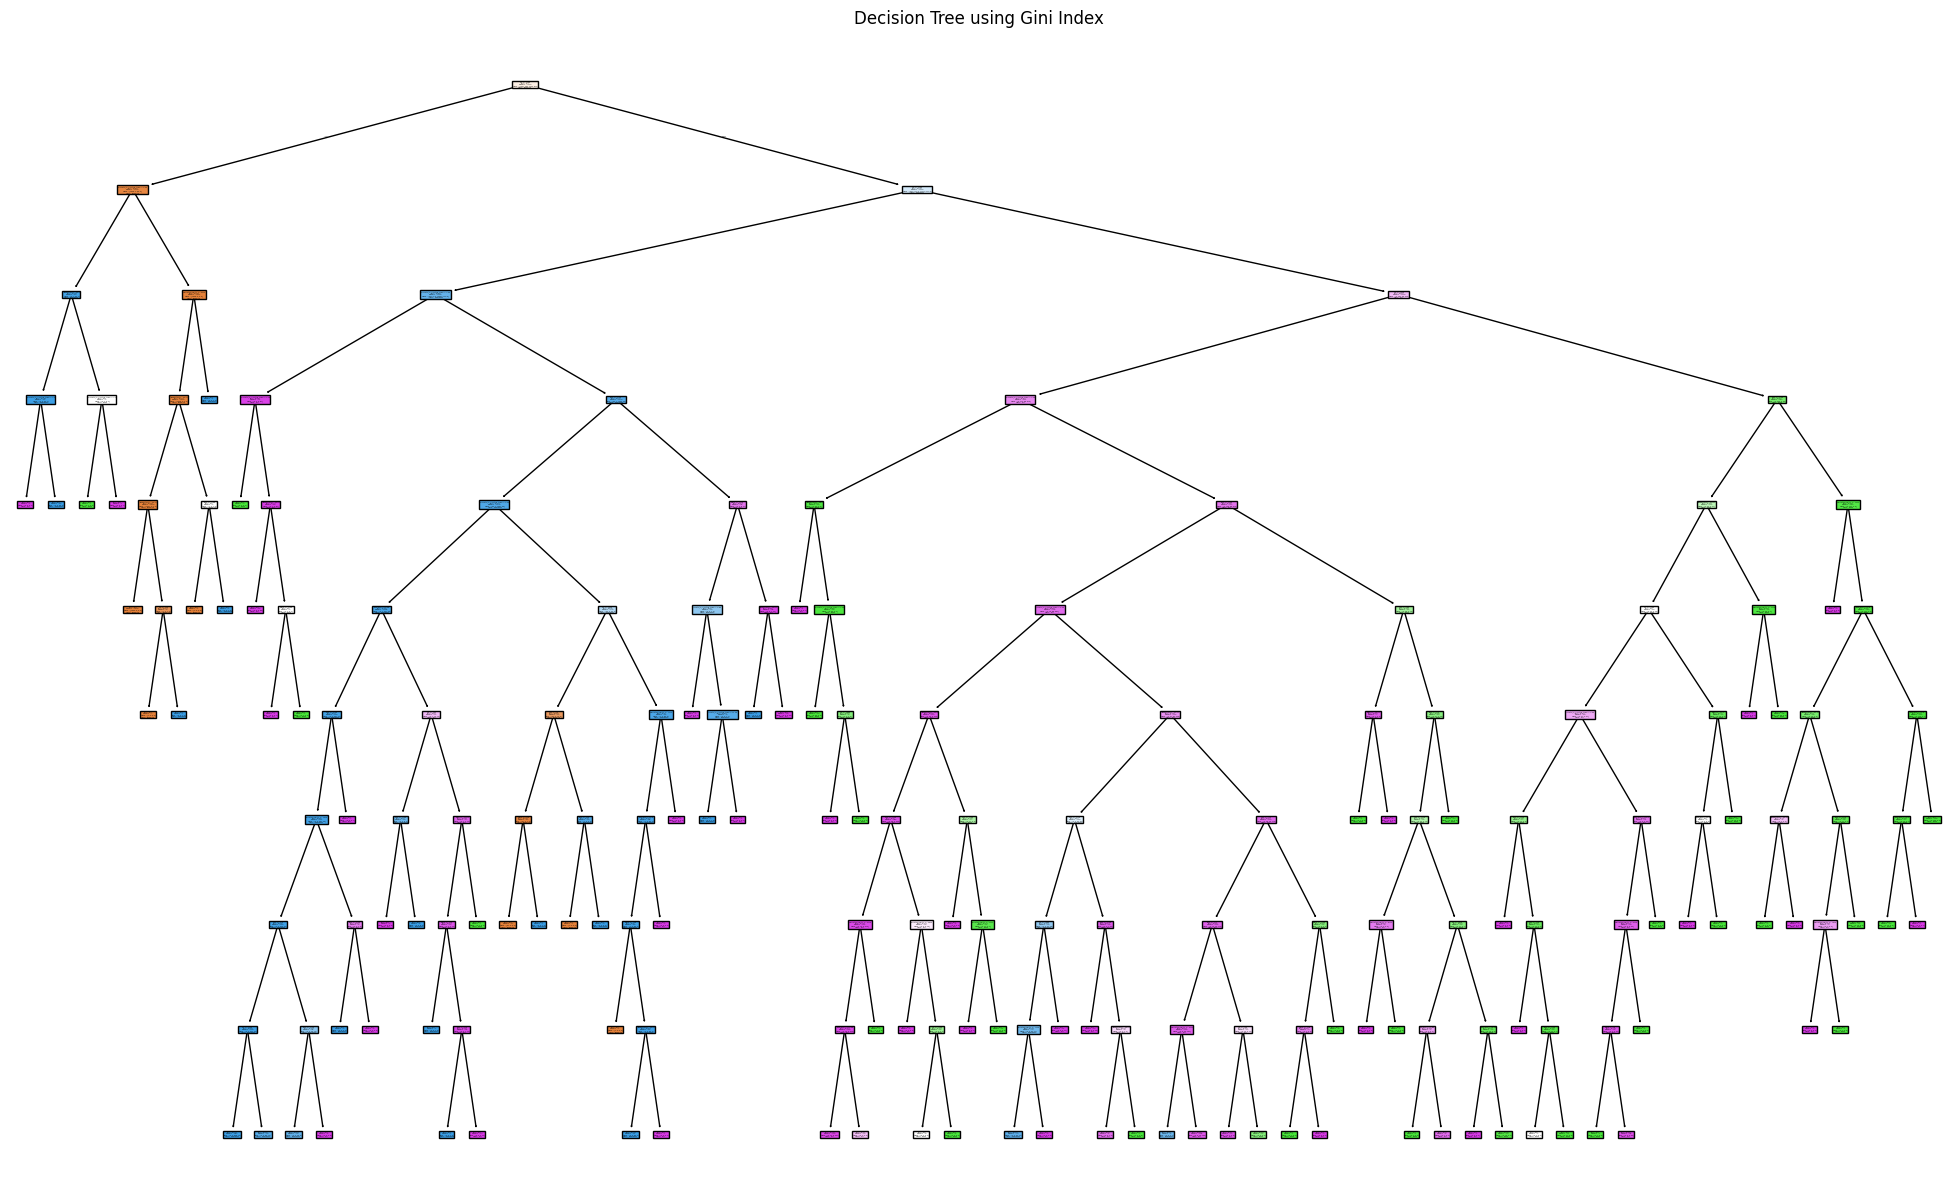

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt

#Splitting Data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Building Decision Tree Model:
#create decision tree classifier object
clf = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=10)

#train decision tree classifier
clf.fit(X_train, y_train)

#prediction
y_pred = clf.predict(X_test)

#Evaluating the Model:
#printing the Performance metrics
print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm)

#Visualizing confusion matrix figure:
cn=df['Air Quality'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)
plt.show()


#Visualizing Decision Trees figure:
plt.figure(figsize=(25, 15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Moderate', 'Good', 'Hazardous','Poor'])
plt.title('Decision Tree using Gini Index')
plt.show()



**3) 60% training / 40% testing**



Accuracy:
 0.9155
Confusion Matrix:
 [[811   0   6   0]
 [  0 151   1  48]
 [  4   0 554  34]
 [  0  41  35 315]]
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      0.99      0.99       817
   Hazardous       0.79      0.76      0.77       200
    Moderate       0.93      0.94      0.93       592
        Poor       0.79      0.81      0.80       391

    accuracy                           0.92      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.92      0.92      0.92      2000


 Confusion Matrix:
 [[811   0   6   0]
 [  0 151   1  48]
 [  4   0 554  34]
 [  0  41  35 315]]


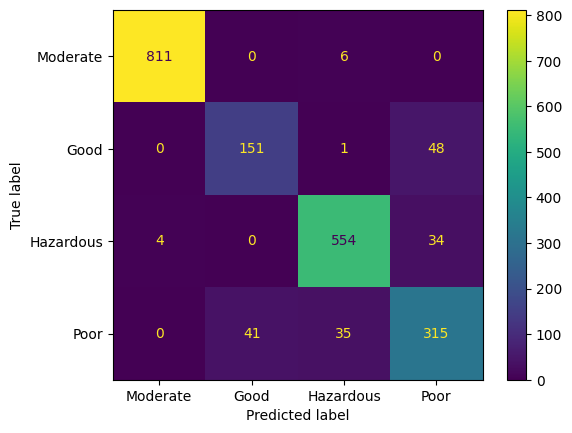

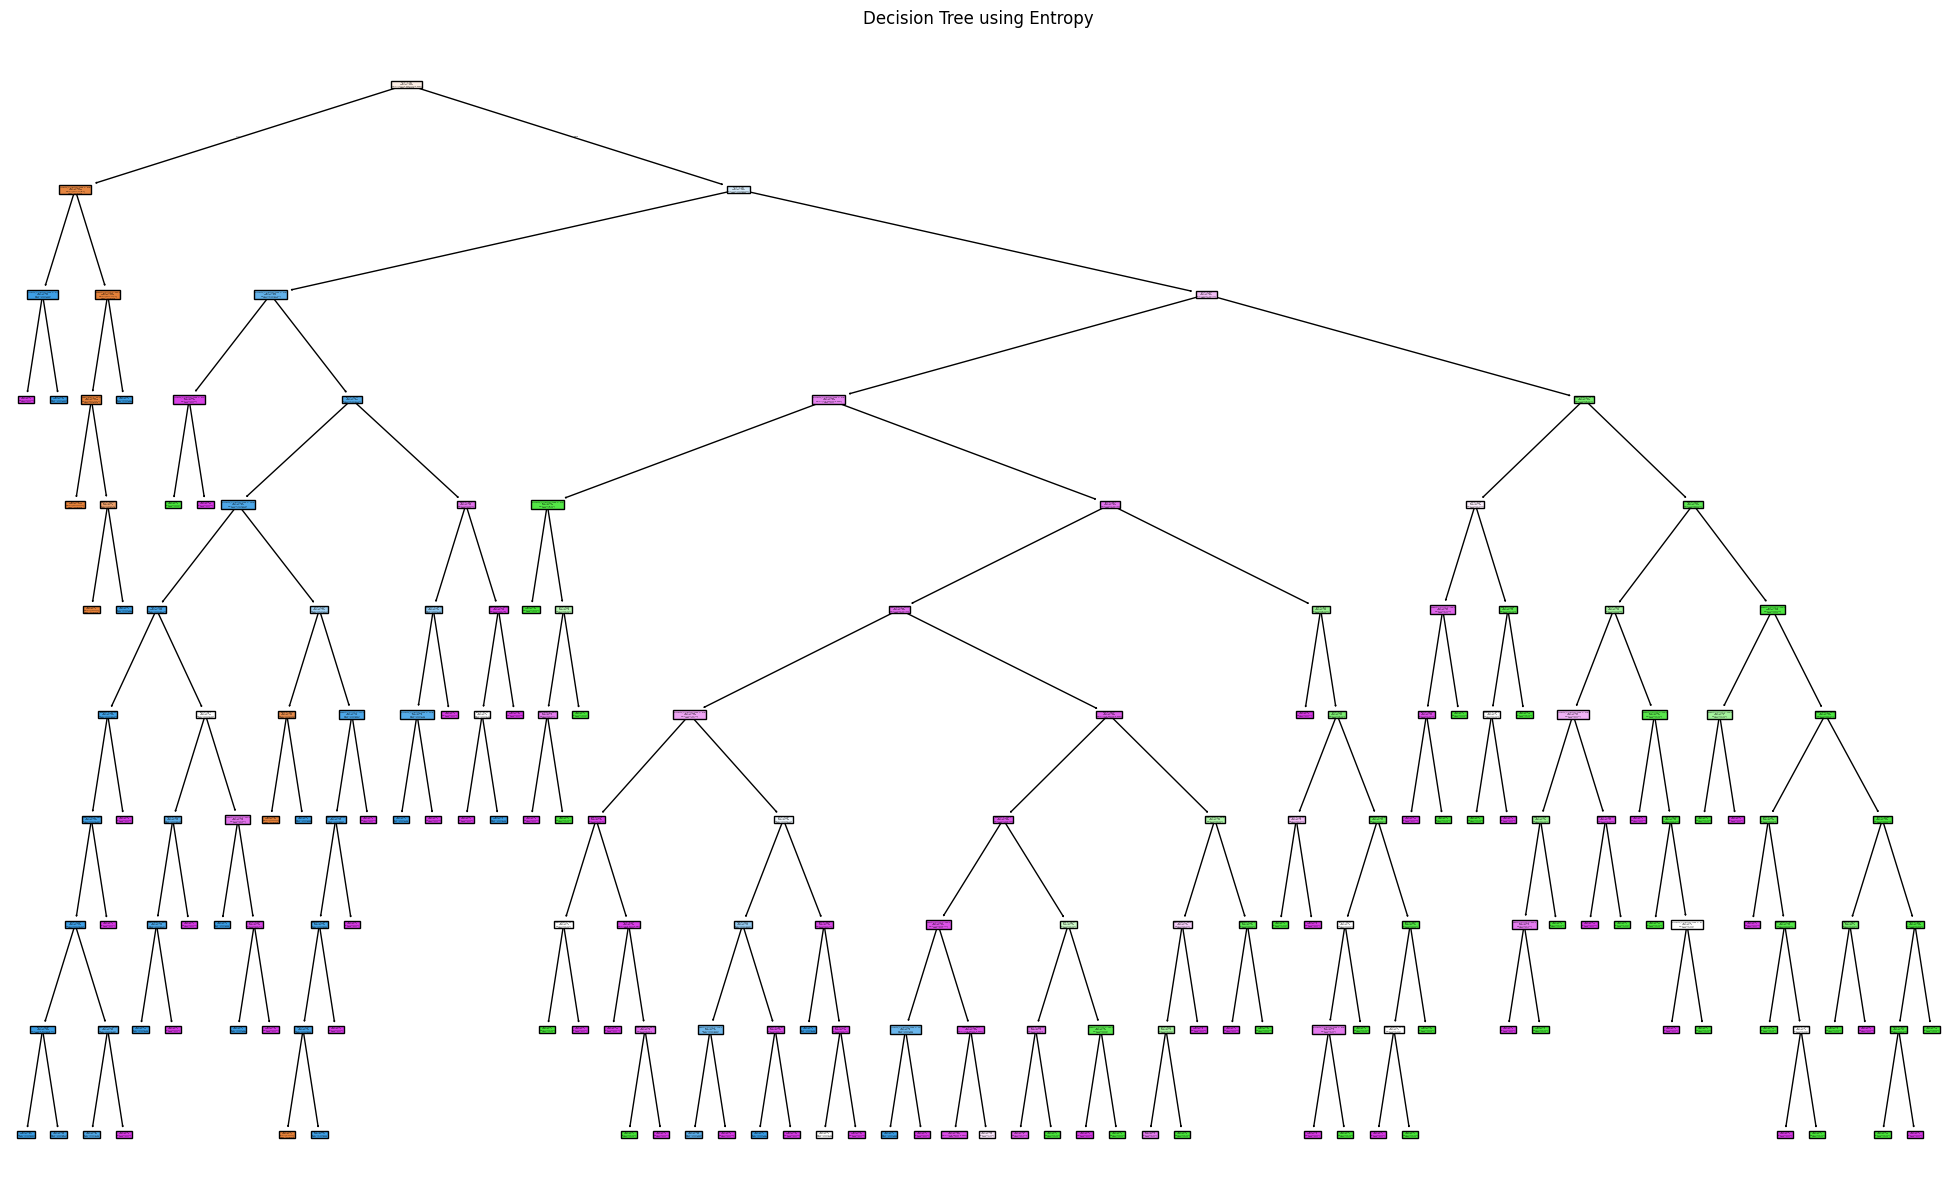

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt

#Splitting Data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#Building Decision Tree Model:
#create decision tree classifier object
clf = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=10)

#train decision tree classifier
clf.fit(X_train, y_train)

#prediction
y_pred = clf.predict(X_test)

#Evaluating the Model:
#printing the Performance metrics

print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm)

#Visualizing confusion matrix figure:
cn=df['Air Quality'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)
plt.show()

#Visualizing Decision Trees figure:
plt.figure(figsize=(25, 15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Moderate', 'Good', 'Hazardous','Poor'])
plt.title('Decision Tree using Entropy')
plt.show()


-----------------------------------
**First Partition (70% training / 30% testing):**

- **Accuracy:** 91.5%
- **Error Rate:** 8.5%
- **Recall:**

    - Good: 1.00 – All actual "Good" instances were correctly classified.

    - Hazardous: 0.82 – Some actual "Hazardous" instances were misclassified, often as "Poor".

    - Moderate: 0.90 – Most "Moderate" instances were correctly identified.

    - Poor: 0.80 – Missed 20% of actual "Poor" cases.

- **Precision:**

  - Good: 1.00 – Every instance predicted as "Good" was actually "Good".

  - Hazardous: 0.79 – Some predictions of "Hazardous" were incorrect.

  - Moderate: 0.94 – High precision; few false "Moderate" predictions.

  - Poor: 0.78 – Some incorrect predictions as "Poor".

- **F1-Score:**

  - Good and Moderate: Strong and consistent.

  - Hazardous and Poor: Acceptable but can be improved.

- **Specificity (approximate):**

  - Good: 1.00 – No false positives.

  - Hazardous: 0.97 – Few incorrect predictions as "Hazardous".

  - Moderate: 0.93 – Some confusion with other classes.

  - Poor: 0.91 – Noticeable false positives.

- **Outcome Summary:**

  - Excellent performance for “Good” and “Moderate” classes.

  - Moderate confusion between “Hazardous” and “Poor”.

  - Balanced results, but the minority classes need better separation.

----------------

**Second Partition (80% training / 20% testing):**

- **Accuracy:** 93.1%
- **Error Rate:** 6.9%
- **Recall:**

  - Good: 1.00 – All "Good" cases correctly identified.

  - Hazardous: 0.80 – Slight improvement over 70/30.

  - Moderate: 0.95 – Strong model performance.

  - Poor: 0.84 – Fewer misclassifications than other partitions.

- **Precision:**

  - Good: 0.99 – Almost perfect.

  - Hazardous: 0.81 – Improved compared to 70/30.

  - Moderate: 0.97 – Very high precision.

  - Poor: 0.82 – More accurate predictions for “Poor”.

- **F1-Score:**

  - Good and Moderate: Excellent performance.

  - Hazardous and Poor: Improved over the other partitions.

- **Specificity (approximate):**

  - Good: 1.00 – No false positives.

  - Hazardous: 0.96 – Strong separation.

  - Moderate: 0.94 – Stable performance.

  - Poor: 0.92 – Reduced confusion.

- **Outcome Summary:**

  - Best overall performance among all partitions.

  - High precision, recall, and F1-scores for every class.

  - Very balanced model with the highest accuracy and lowest error rate.

  - "Hazardous" and "Poor" still slightly weaker but improved.


------------------
**Third Partition (60% training / 40% testing):**

- **Accuracy:** 91.55%
- **Error Rate:** 8.05%

- **Recall:**

  - Good: 0.99 – Missed only one instance.

  - Hazardous: 0.77 – Lower than other partitions.

  - Moderate: 0.95 – Consistent with other results.

  - Poor: 0.78 – Room for improvement.

- **Precision:**

  - Good: 0.99 – High precision for “Good”.

  - Hazardous: 0.78 – Slightly lower than other splits.

  - Moderate: 0.93 – Strong performance.

  - Poor: 0.80 – Acceptable precision.


- **F1-Score:**

  - Good and Moderate: Consistently high.

  - Hazardous and Poor: Weaker due to lower recall.

- **Specificity (approximate):**

  - Good: 1.00 – Excellent.

  - Hazardous: 0.95 – Some confusion.

  - Moderate: 0.92 – Minor false positives.

  - Poor: 0.90 – More misclassifications compared to others.

- **Outcome Summary:**

  Very strong for “Good” and “Moderate” classes.

  “Hazardous” class is the weakest due to both low precision and recall.

  “Poor” class accuracy is acceptable but not optimal.

  Performance is solid but slightly affected by the smaller training set.
  
  -----

**Final Summary Table:**

| Metric | Partition 1 (70/30) | Partition 2 (80/20) | Partition 3 (60/40)|
| :--------: | :--------:  | :--------: | :--------:|
| Accuracy |  91.5% | 93.1% | 91.55% |
| Error Rate |  8.5% | 6.9% | 8.05% |
| Best Recall | Good (1.00)| Good (1.00) | Good (0.99) |
| Weakest Recall |  Hazardous (0.82)	 | Hazardous (0.80)	| Hazardous (0.77)|
| Best Precision |  Good (1.00)	 | Good (0.99) | Good (0.99) |
| Specificity (avg.)	 |  ~0.95	 | ~0.96	 | ~0.94 |
| Strongest Classes |  Good, Moderate	| All classes balanced | Good, Moderate|
| Weakest Class | Poor | Hazardous | Hazardous |
---------------------------------------------------------

### **Information Gain (Entropy)**

Entropy is a measure of uncertainty or disorder in a dataset. It helps us understand how mixed or impure the data is

Range: Entropy values range from 0 to 1.

- 0 means the dataset is pure (all samples belong to the same class).
- 1 means the dataset is completely mixed (samples are evenly distributed among different classes).

Entropy helps us gauge how mixed a dataset is, and lower entropy is better for making accurate predictions in decision tree models. Its sensitivity to class distribution allows for more nuanced decision-making in creating splits.

**1) 70% training / 30% testing**

Accuracy:
 0.922
Confusion Matrix:
 [[617   0   1   0]
 [  0 118   2  28]
 [  4   0 415  33]
 [  0  27  22 233]]
Classification Report:
               precision    recall  f1-score   support

        Good       0.99      1.00      1.00       618
   Hazardous       0.81      0.80      0.81       148
    Moderate       0.94      0.92      0.93       452
        Poor       0.79      0.83      0.81       282

    accuracy                           0.92      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.92      0.92      0.92      1500


 Confusion Matrix:
 [[617   0   1   0]
 [  0 118   2  28]
 [  4   0 415  33]
 [  0  27  22 233]]


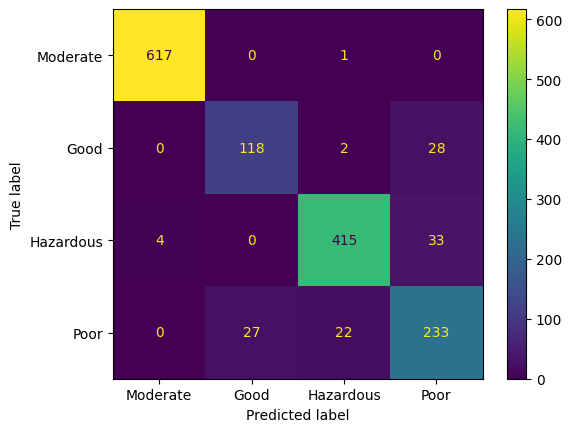

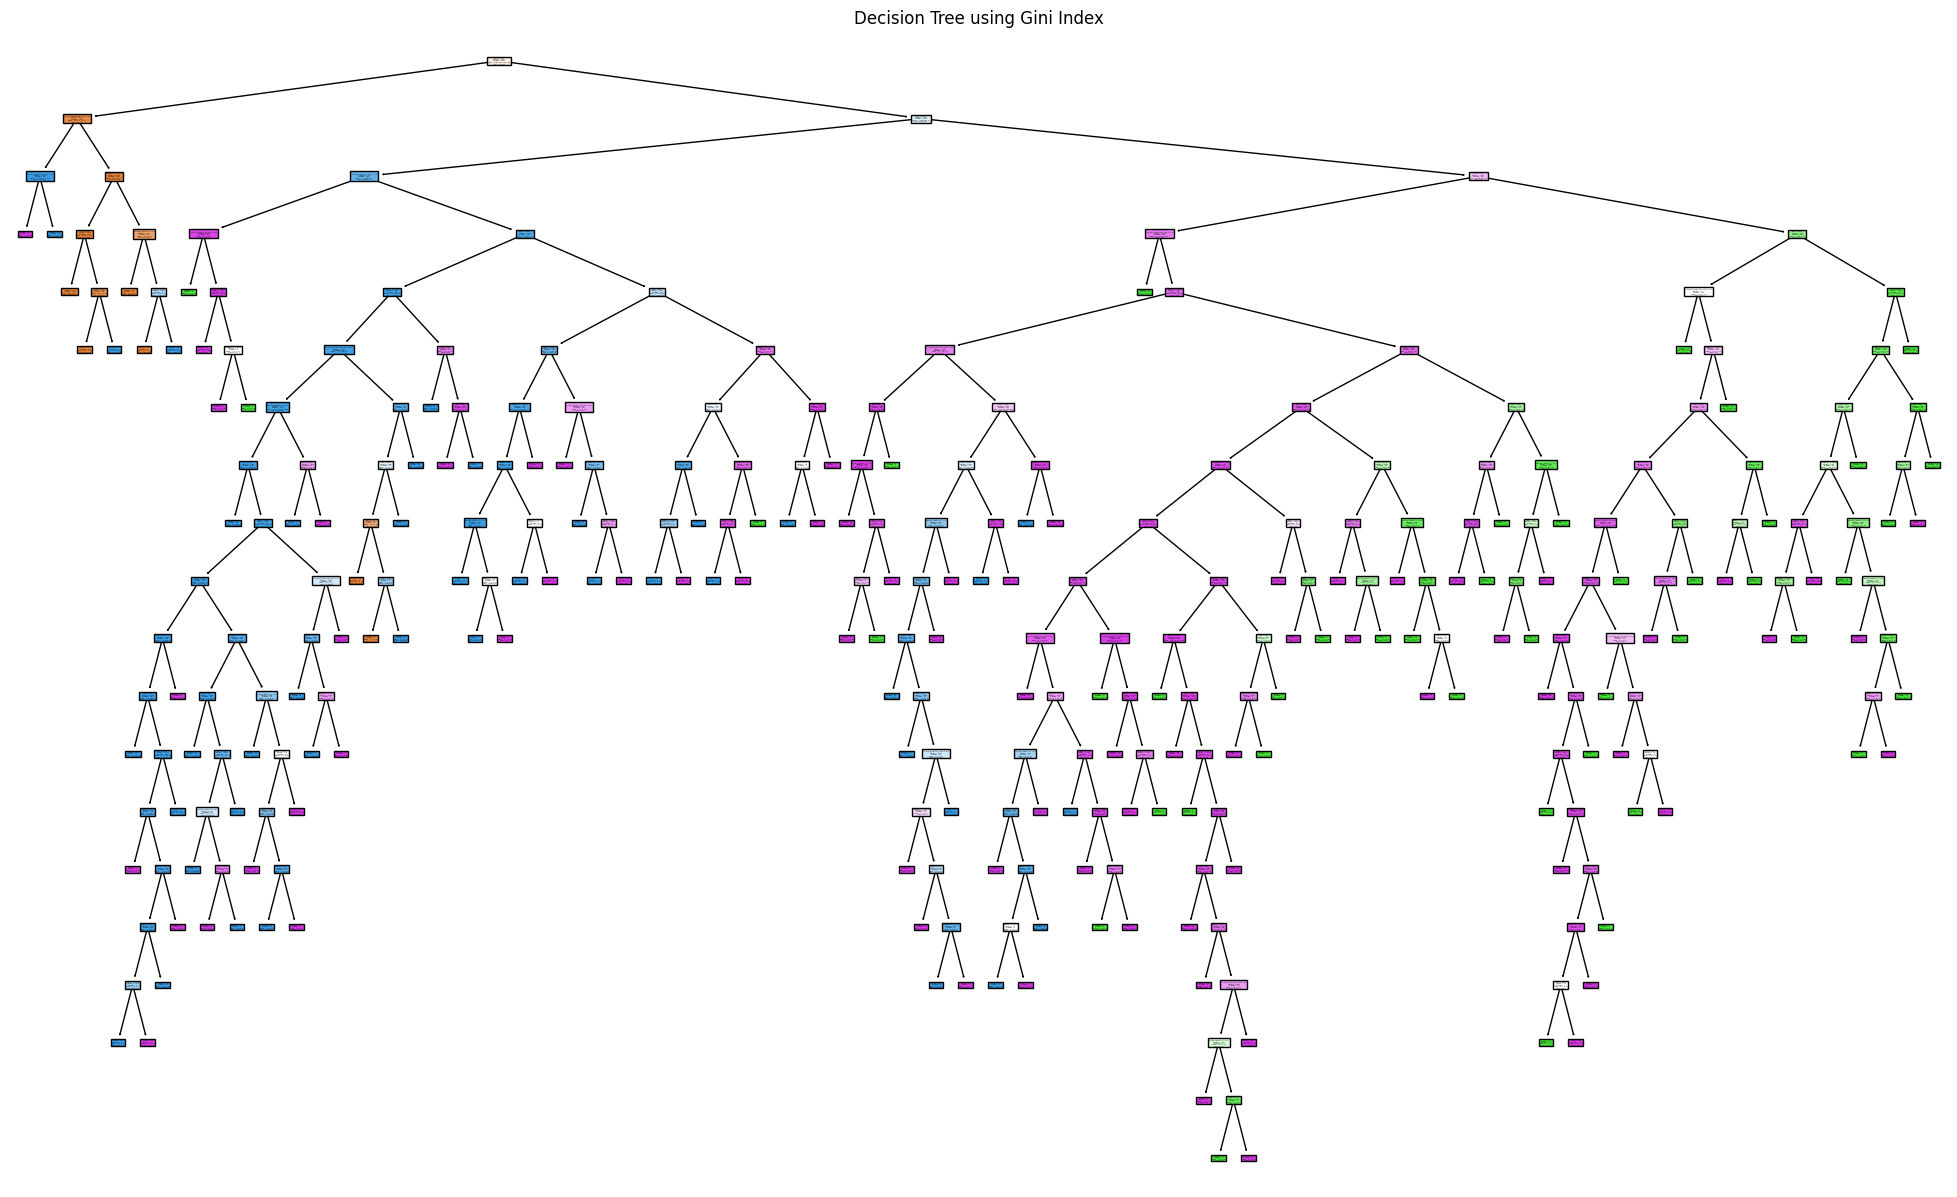

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

#Splitting Data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Building Decision Tree Model:
#create decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy')

#train decision tree classifier
clf.fit(X_train, y_train)

#prediction
y_pred = clf.predict(X_test)

#Evaluating the Model:
#printing the Performance metrics

print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm)

#Visualizing confusion matrix figure:
cn=df['Air Quality'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)
plt.show()


#Visualizing Decision Trees figure:
plt.figure(figsize=(25, 15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Moderate', 'Good', 'Hazardous','Poor'])
plt.title('Decision Tree using Gini Index')
plt.show()

**2) 80% training / 20% testing**

Accuracy:
 0.93
Confusion Matrix:
 [[409   0   0   0]
 [  0  88   0  23]
 [  4   0 274  16]
 [  0  15  12 159]]
Classification Report:
               precision    recall  f1-score   support

        Good       0.99      1.00      1.00       409
   Hazardous       0.85      0.79      0.82       111
    Moderate       0.96      0.93      0.94       294
        Poor       0.80      0.85      0.83       186

    accuracy                           0.93      1000
   macro avg       0.90      0.89      0.90      1000
weighted avg       0.93      0.93      0.93      1000


 Confusion Matrix:
 [[409   0   0   0]
 [  0  88   0  23]
 [  4   0 274  16]
 [  0  15  12 159]]


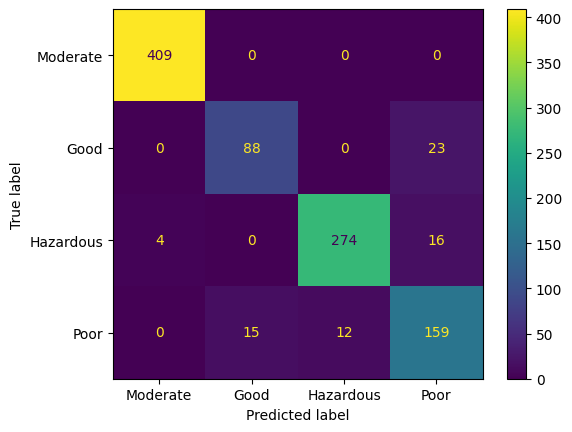

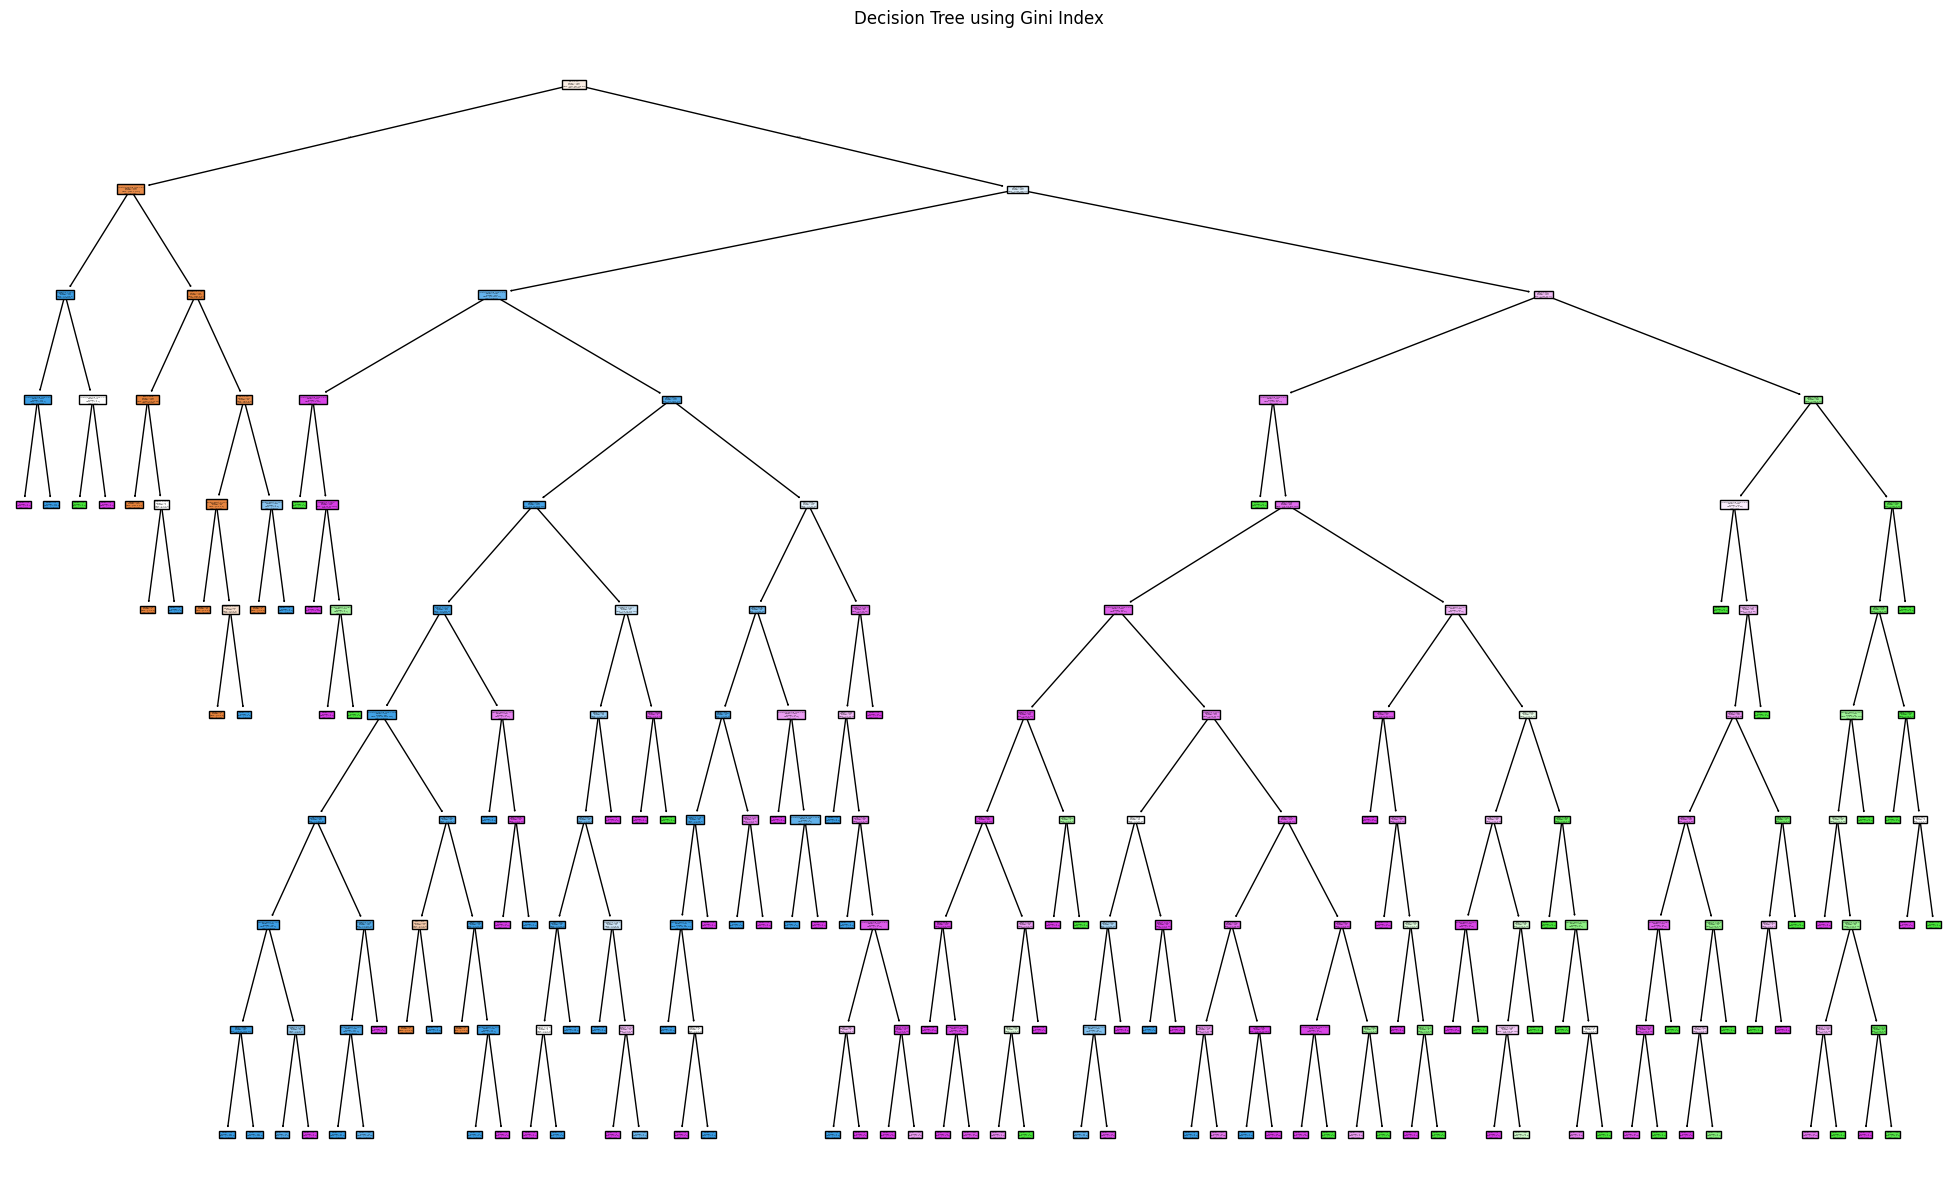

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt

#Splitting Data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Building Decision Tree Model:
#create decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=10)

#train decision tree classifier
clf.fit(X_train, y_train)

#prediction
y_pred = clf.predict(X_test)

#Evaluating the Model:
#printing the Performance metrics
print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm)

#Visualizing confusion matrix figure:
cn=df['Air Quality'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)
plt.show()


#Visualizing Decision Trees figure:
plt.figure(figsize=(25, 15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Moderate', 'Good', 'Hazardous','Poor'])
plt.title('Decision Tree using Gini Index')
plt.show()

**3) 60% training / 40% testing**

Accuracy:
 0.9195
Confusion Matrix:
 [[816   0   1   0]
 [  0 157   1  42]
 [  6   0 562  24]
 [  0  48  39 304]]
Classification Report:
               precision    recall  f1-score   support

        Good       0.99      1.00      1.00       817
   Hazardous       0.77      0.79      0.78       200
    Moderate       0.93      0.95      0.94       592
        Poor       0.82      0.78      0.80       391

    accuracy                           0.92      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.92      0.92      0.92      2000


 Confusion Matrix:
 [[816   0   1   0]
 [  0 157   1  42]
 [  6   0 562  24]
 [  0  48  39 304]]


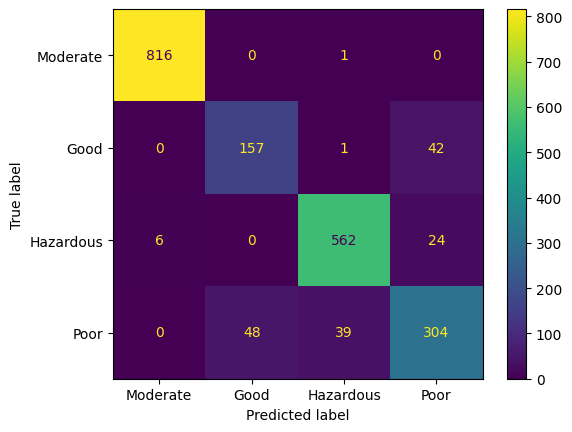

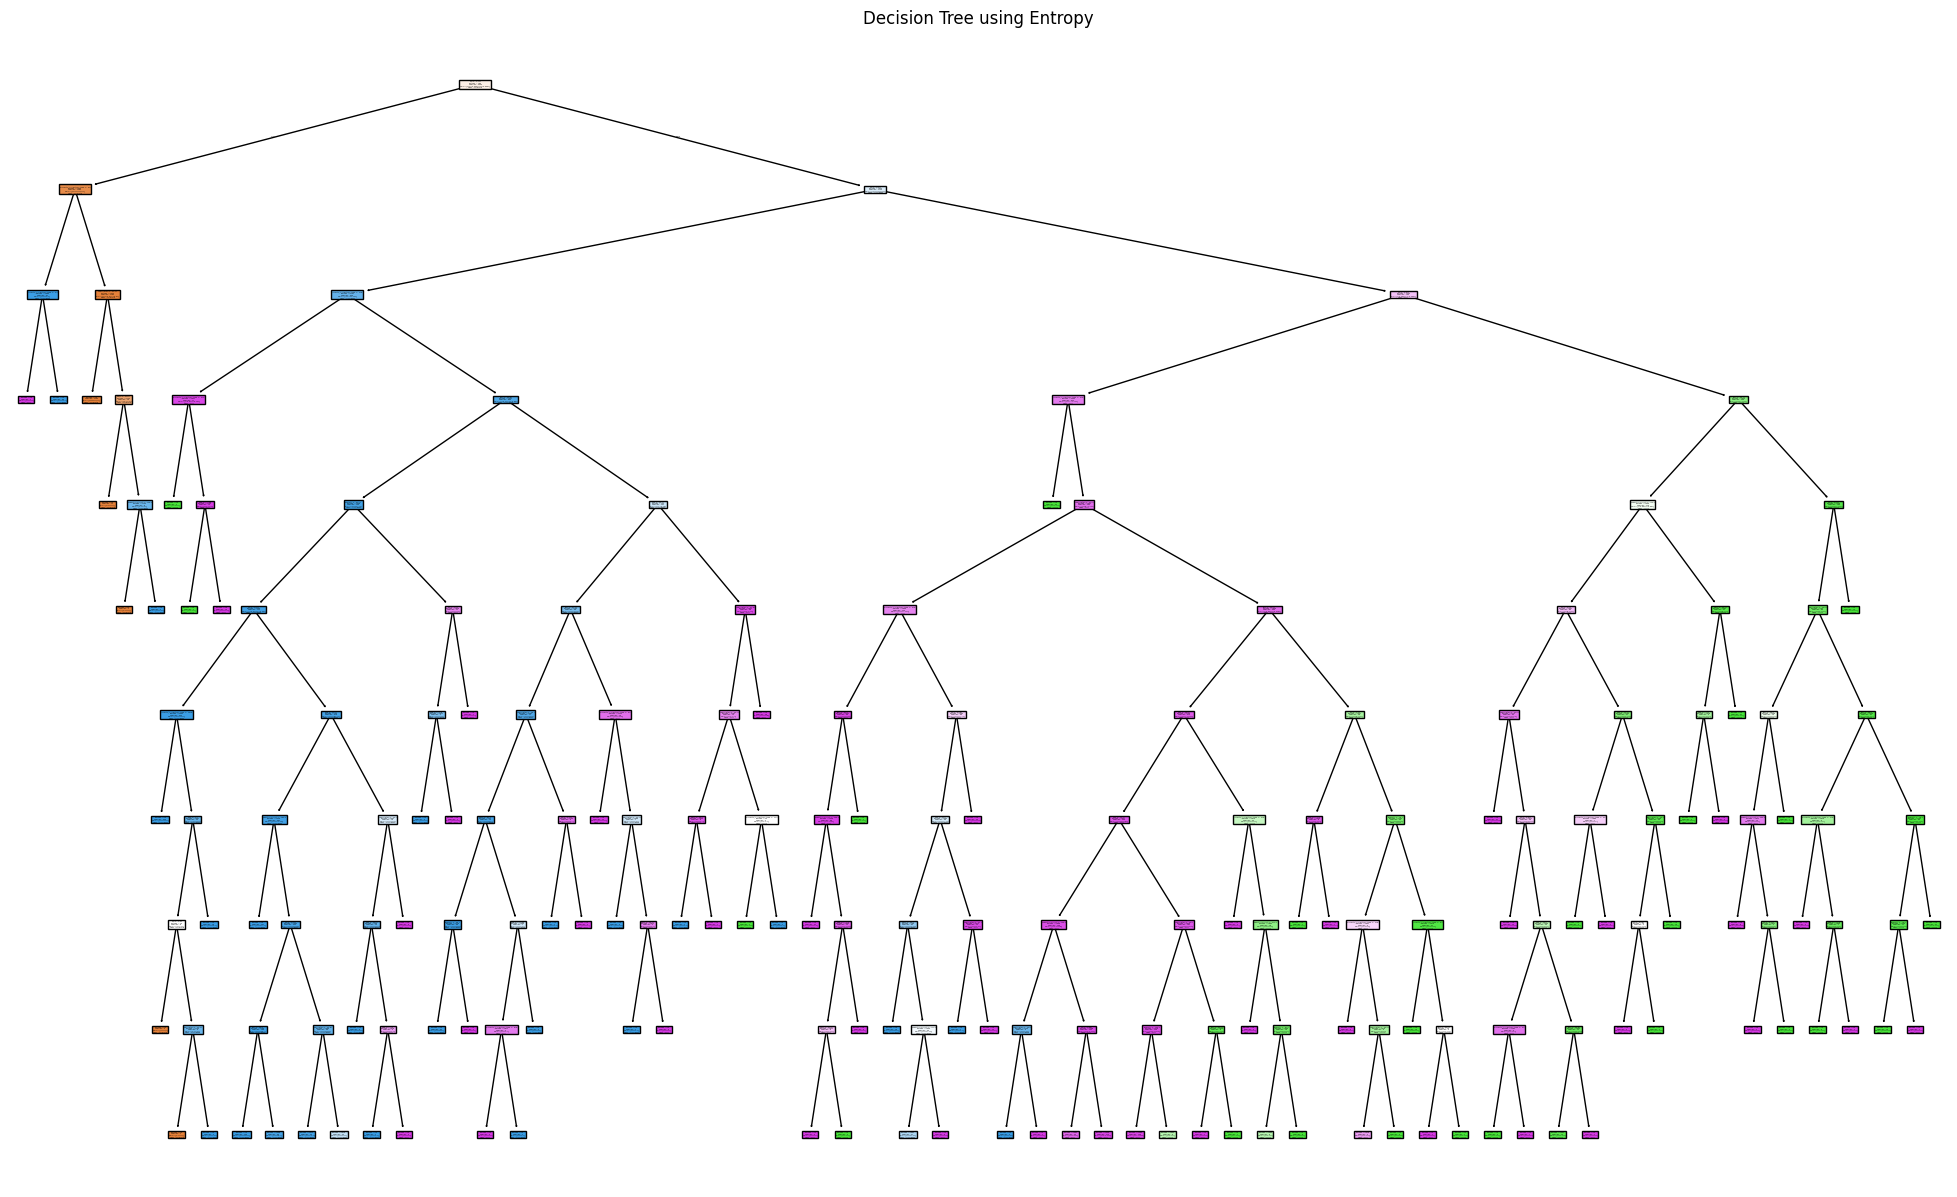

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt

#Splitting Data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#Building Decision Tree Model:
#create decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=10)

#train decision tree classifier
clf.fit(X_train, y_train)

#prediction
y_pred = clf.predict(X_test)

#Evaluating the Model:
#printing the Performance metrics

print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm)

#Visualizing confusion matrix figure:
cn=df['Air Quality'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)
plt.show()

#Visualizing Decision Trees figure:
plt.figure(figsize=(25, 15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Moderate', 'Good', 'Hazardous','Poor'])
plt.title('Decision Tree using Entropy')
plt.show()

-----------------
**First Partition (70% training / 30% testing):**

- **Accuracy:** 92.2%
- **Error Rate:** 7.8%

- **Recall:**
  - Good: 1.00 – All actual "Good" instances were correctly classified.

  - Hazardous: 0.80 – Some “Hazardous” instances were misclassified, mostly as “Poor”.

  - Moderate: 0.92 – Strong recall; only minor misclassifications.

  - Poor: 0.83 – Majority identified correctly, but confusion exists.

- **Precision:**
  - Good: 0.99 – Very high; almost no false positives.

  - Hazardous: 0.81 – Some incorrect predictions as “Hazardous”.

  - Moderate: 0.94 – Strong precision, few false positives.

  - Poor: 0.79 – Acceptable precision, but some confusion with other classes.

- **F1-Score:**
  - Good and Moderate: Excellent consistency.

  - Hazardous and Poor: Solid but need improvement.

- **Specificity (approximate):**

  - Good: 1.00 – No false positives.

  - Hazardous: 0.96 – Few incorrect predictions as “Hazardous”.

  - Moderate: 0.93 – Slight confusion with “Poor”.

  - Poor: 0.91 – Some misclassifications as “Hazardous” or “Moderate”.

- **Outcome Summary:**

  - Excellent performance for “Good” and “Moderate”.

  - Noticeable confusion between “Hazardous” and “Poor”.

  - Balanced overall, but hazardous class requires more attention.

---------
**Second Partition (80% training / 20% testing):**

- **Accuracy:** 93.0%
- **Error Rate:** 7.0%

- **Recall:**
  - Good: 1.00 – All "Good" instances were perfectly predicted.

  - Hazardous: 0.79 – Slightly weaker, often confused with “Poor”.

  - Moderate: 0.93 – Great performance with minor errors.

  - Poor: 0.85 – Best recall for “Poor” across all splits.

- **Precision:**
  - Good: 0.99 – Extremely reliable.

  - Hazardous: 0.85 – Better precision than in 70/30.

  - Moderate: 0.96 – Very strong performance.

  - Poor: 0.80 – Decent, better than earlier split.

- **F1-Score:**
  - Good and Moderate: High and consistent.

  - Hazardous and Poor: Improved over first partition.

- **Specificity (approximate):**

  - Good: 1.00 – No incorrect positives.

  - Hazardous: 0.96 – Good separation.

  - Moderate: 0.94 – Maintains solid distinction.

  - Poor: 0.92 – Strong performance.

- **Outcome Summary:**

  - Highest overall accuracy and performance.

  - Best recall for “Poor” and improved precision for “Hazardous”.

  - Balanced and reliable across all classes.

-------------
**Third Partition (60% training / 40% testing):**

- **Accuracy:** 91.95%
- **Error Rate:** 8.05%

- **Recall:**

  - Good: 1.00 – Only one instance misclassified.

  - Hazardous: 0.79 – Consistently weaker; often misclassified as “Poor”.

  - Moderate: 0.95 – Strong and stable.

  - Poor: 0.78 – Needs improvement.

- **Precision:**

  - Good: 0.99 – Very high precision.

  - Hazardous: 0.77 – More false positives than other partitions.

  - Moderate: 0.93 – Great performance.

  - Poor: 0.82 – Acceptable but not optimal.

- **F1-Score:**

  - Good and Moderate: Excellent as usual.

  - Hazardous and Poor: Lower due to recall/precision gaps.

- **Specificity (approximate):**

  - Good: 1.00 – Strong separation.

  - Hazardous: 0.94 – More confusion with “Poor”.

  - Moderate: 0.92 – Slight confusion.

  - Poor: 0.90 – Most misclassified among all.

- **Outcome Summary:**

  - Strong and reliable for “Good” and “Moderate”.

  - Slight dip in “Hazardous” and “Poor” performance.

  - Still a well-balanced model with high accuracy.

**Final Summary Table:**

| Metric | Partition 1 (70/30) | Partition 2 (80/20) | Partition 3 (60/40)|
| :--------: | :--------:  | :--------: | :--------:|
| Accuracy |  92.2% | 93.0% | 91.95% |
| Error Rate |  7.8% | 7.0% | 8.05% |
| Best Recall | Good (1.00)| Good (1.00) | Good (1.00) |
| Weakest Recall |  Hazardous (0.80)	 | Hazardous (0.79)	| Poor (0.78)|
| Best Precision |  Good (0.99)	 | Good (0.99) | Good (0.99) |
| Specificity (avg.)	 |  ~0.95	 | ~0.96	 | ~0.94 |
| Strongest Classes |  Good, Moderate	| All classes balanced | Good, Moderate|
| Weakest Class | Hazardous | Hazardous | Poor |
---------------------------------------------------------

# Clustering


**Preparing for clustering**

In [ ]:
#to prepare for clustering, we need to make sure all values are numeric, since air quality is ordinal we will encode it to numerical labels
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Air Quality']=le.fit_transform(df['Air Quality'])
print('Encoded Data:\n')
print(df.head(20))


Encoded Data:

    Unnamed: 0  Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1            1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2            2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3            3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4            4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   
5            5         39.4      96.6   14.6  35.5  42.9  17.9  1.82   
6            6         41.7      82.5    1.7  15.8  31.1  12.7  1.80   
7            7         31.0      59.6    5.0  16.8  24.2  13.6  1.38   
8            8         29.4      93.8   10.3  22.7  45.1  11.8  2.03   
9            9         33.2      80.5   11.1  24.4  32.0  15.3  1.69   
10          10         26.3      65.7    1.3   5.5  18.3   5.9  0.85   
11          11         32.5      51.2    1.6  10.5  21.6  19.3  1.53   
12          12         20.0      53.3    3.7  12.

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
#drop the categorical column air quality
df_no_label = df.drop(columns=['Air Quality'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_no_label)
df_scaled = pd.DataFrame(scaled_features, columns=df_no_label.columns)
print('Scaled Data (without Air Quality column):\n')
print(df_scaled.head(20))


Scaled Data (without Air Quality column):

    Unnamed: 0  Temperature  Humidity     PM2.5      PM10       NO2       SO2  \
0    -1.731704    -0.034080 -0.690715 -0.608589 -0.450455 -0.844581 -0.120721   
1    -1.731012    -0.257295  0.349507 -0.726706 -0.658892  0.493329 -0.046643   
2    -1.730319    -1.031106  0.292768  0.267100  0.130973 -0.226219  0.383011   
3    -1.729626    -0.435867 -1.951591 -0.571933 -0.874642 -1.451700 -0.698530   
4    -1.728933    -0.525153  0.040593 -0.539349 -0.519934 -0.507293 -0.654083   
5    -1.728240     1.394493  1.673427 -0.225730  0.193138  1.853726  1.168239   
6    -1.727548     1.736756  0.784509 -0.751143 -0.527248  0.527058  0.397826   
7    -1.726855     0.144491 -0.659193 -0.616735 -0.490680 -0.248705  0.531167   
8    -1.726162    -0.093604  1.496904 -0.400868 -0.274930  2.101070  0.264486   
9    -1.725469     0.471873  0.658422 -0.368284 -0.212765  0.628245  0.783033   
10   -1.724776    -0.554915 -0.274626 -0.767435 -0.903896 -0.91203

**Elbow Method**

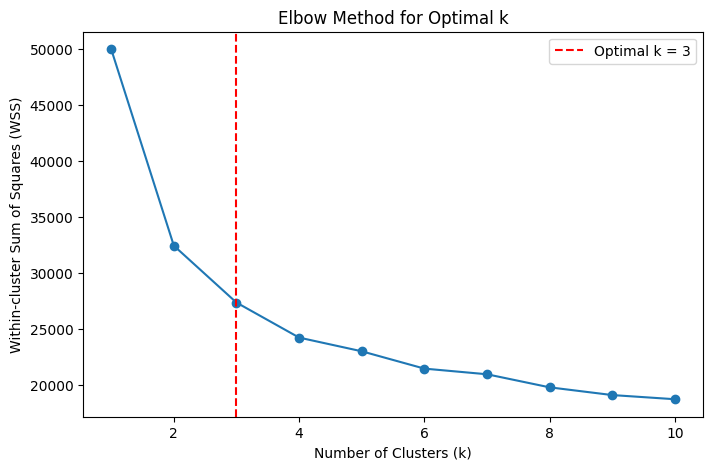

Optimal number of clusters: 3


In [ ]:
!pip install kneed
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator
#our standardized dataset
X = df_scaled
#perform k-means clustering for different values of k (1 to 10)
wss_values = []
k_values = range(1, 11)
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
  kmeans.fit(X)
  wss_values.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wss_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

# Use KneeLocator to find the turning point (elbow)
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow

# Highlight the elbow point
plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Optimal k = {turning_point}')
plt.legend()
plt.show()

print(f"Optimal number of clusters: {turning_point}")

**Silhoutte method**

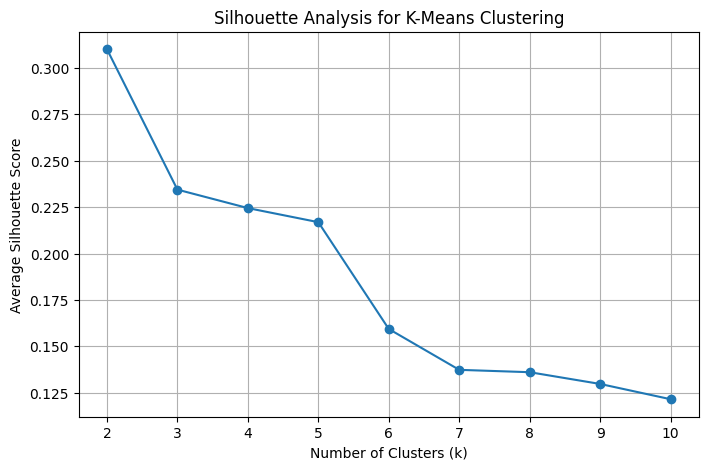

The highest average Silhouette score is 0.310132048759547 with k=2.
The second highest average Silhouette score is 0.23443783693136225 with k=3.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Perform k-means clustering with different values of k (from 1 to 10)
k_values = range(2, 11)
silhouette_avg_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_result = kmeans.fit_predict(df_scaled)  # Use your scaled dataset
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)  # Calculate silhouette score
    silhouette_avg_values.append(silhouette_avg)

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_avg_values, marker='o', linestyle='-')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid()
plt.show()

# Print the best and second-best k values based on silhouette score
print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")


**K-means**

Cluster Centers:
[[-0.02174442  0.76885709  0.68706816  0.52345884  0.64323406  0.79701271
   0.75444604  0.89116735 -0.81088025  0.70762131]
 [ 0.01555304 -0.54993723 -0.4914364  -0.37441224 -0.46008336 -0.57007599
  -0.5396295  -0.63742158  0.57999496 -0.50613737]]

Cluster Labels:
[1 0 0 ... 1 1 0]


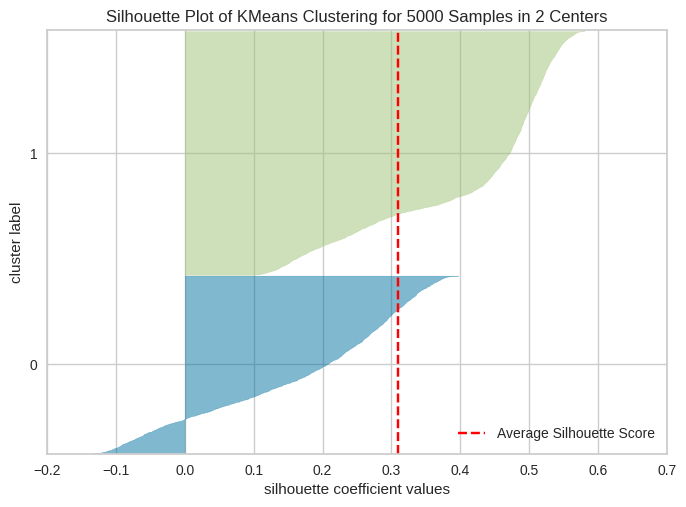

WSS: 32446.121538684518
Average Silhouette Score: 0.3105567152790788


In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

#perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)


#print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)
wss = kmeans.inertia_

#compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)


#visualizing
kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

#print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

Cluster Centers:
[[-0.00916425  0.20743814  0.19950691 -0.11119628 -0.0449986   0.21678844
   0.18630135  0.27273039 -0.58350796  0.19707027]
 [ 0.01706612 -0.73681121 -0.63166113 -0.41110423 -0.54264675 -0.75624841
  -0.71934108 -0.87609545  0.95831732 -0.63831163]
 [-0.01924124  1.22157319  1.00223848  1.15283283  1.31035811  1.24574532
   1.22628805  1.39833988 -0.93736743  1.0222125 ]]

Cluster Labels:
[0 0 0 ... 0 1 0]


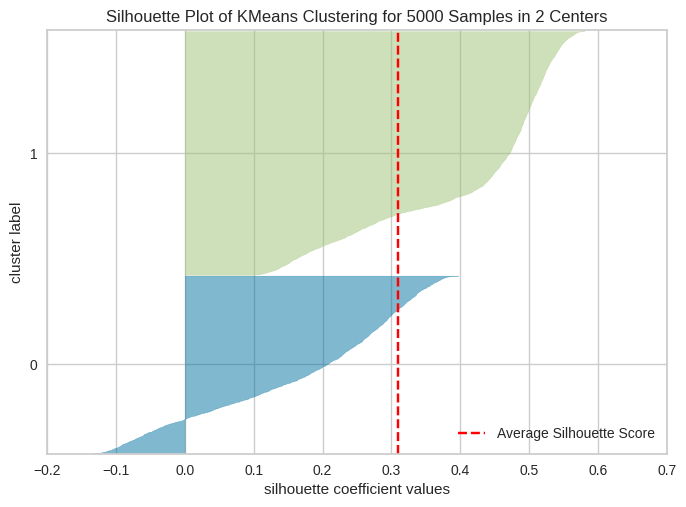

WSS: 27363.574023291174
Average Silhouette Score: 0.23443783693136225


In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

#perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)


#print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)
wss = kmeans.inertia_

#compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)


#visualizing
kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

#print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

We chose k=4 as the third option because it gives us a smooth transition from k=2, and k=3, this helps determine if adding an extra cluster further improves separation or just overfits the data.


Cluster Centers:
[[-0.02307017  1.15334105  0.98691061  0.02731404  0.27892403  1.17305939
   1.1973899   1.30744745 -0.96601764  0.98590484]
 [ 0.01528933 -0.74116447 -0.63292011 -0.41704525 -0.55117074 -0.76619084
  -0.72522857 -0.89156093  0.97613232 -0.64436753]
 [-0.00629596  0.93989167  0.75202287  2.72122187  2.67430305  0.96015714
   0.83290394  1.12708401 -0.80546194  0.80003517]
 [-0.00483477  0.07328361  0.0727208  -0.09714985 -0.05969622  0.08913744
   0.05227859  0.13393989 -0.50415337  0.07698628]]

Cluster Labels:
[3 3 3 ... 3 1 2]


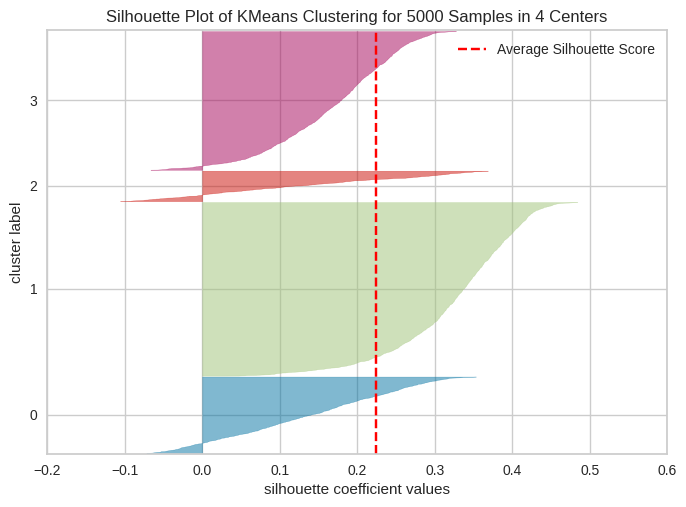

WSS: 24235.442762449253
Average Silhouette Score: 0.2235432662797466


In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

#perform K-means clustering for K=4
kmeans = KMeans(n_clusters=4, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)


#print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)
wss = kmeans.inertia_

#compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)


#visualizing
kmeans = KMeans(n_clusters=4,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

#print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

 **Comparing**

 1. WSS: 32446.12, Silhouette Score: 0.3106

Analysis: This configuration has the highest Silhouette Score, indicating better separation between clusters. However, the WSS is the highest, suggesting that the clusters are the least compact. Overall, there’s a balance between separation and cohesion, but the cohesion is not ideal.
2. WSS: 27363.57, Silhouette Score: 0.2344

Analysis: The WSS is lower than the first configuration, indicating that the clusters are more compact. However, the Silhouette Score is lower, meaning the separation between clusters is not as good as in the first configuration. Although the clusters are more compact, they are not as well-separated.

3. WSS: 24235.44, Silhouette Score: 0.2235

Analysis: This configuration has the lowest WSS, indicating that the clusters are the most compact. However, it also has the lowest Silhouette Score, meaning the clusters are the least well-separated. While the clusters are tightly packed, their separation is not ideal.

Final comparison:
Since k=2 has the highest silhouette score (best separation), despite having a higher WSS, we favor separation over compactness, so it is the best choice.


